In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd. read_csv('healthcare-dataset-stroke-data (1).csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# problem statement

In [5]:
# we want build Logistic regression moel which will predict stroke happen or not

<Axes: xlabel='stroke', ylabel='count'>

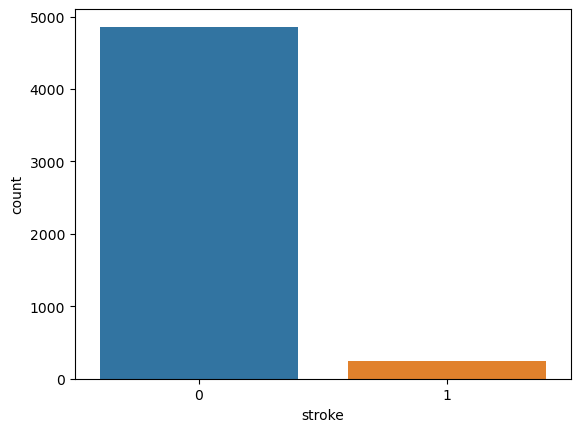

In [9]:
sns.countplot(x = 'stroke', data = df)

<Axes: xlabel='stroke', ylabel='count'>

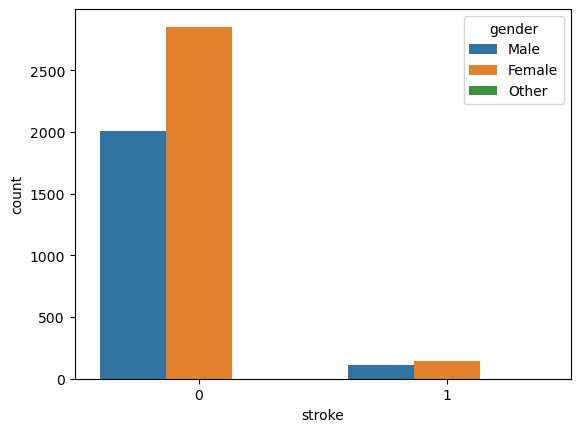

In [15]:
sns.countplot(x = 'stroke', hue = 'gender', data = df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: xlabel='stroke', ylabel='age'>

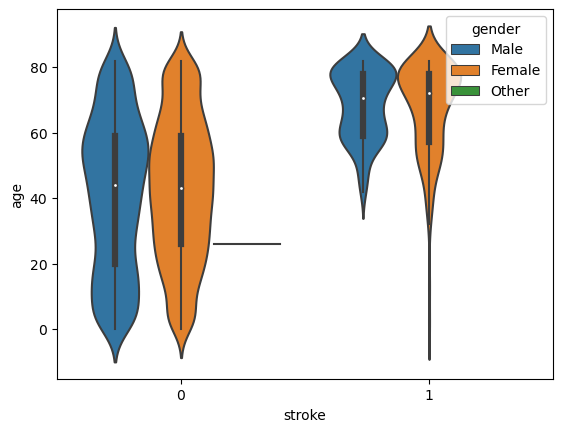

In [27]:
sns.violinplot(x='stroke', y ='age', hue='gender', data = df)

<Axes: >

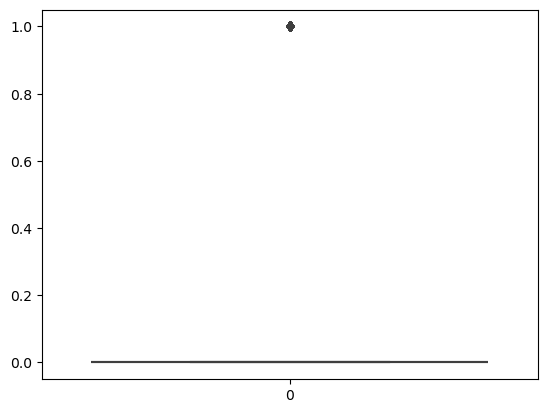

In [29]:
sns.boxplot(df['stroke'])

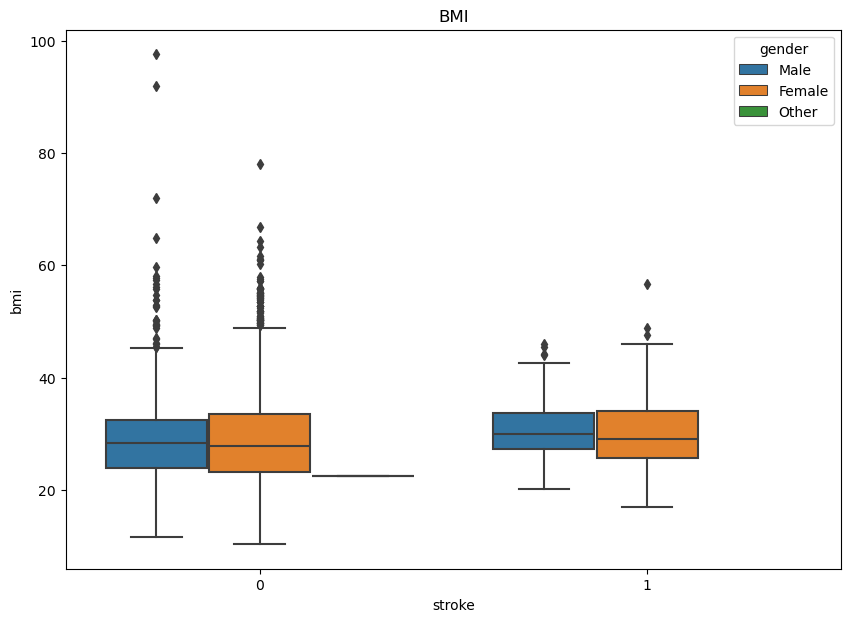

In [30]:
plt.figure(figsize = (10,7))
sns.boxplot(x='stroke', y ='bmi', hue='gender', data = df)
plt.title('BMI')
plt.show()

<Axes: xlabel='stroke', ylabel='count'>

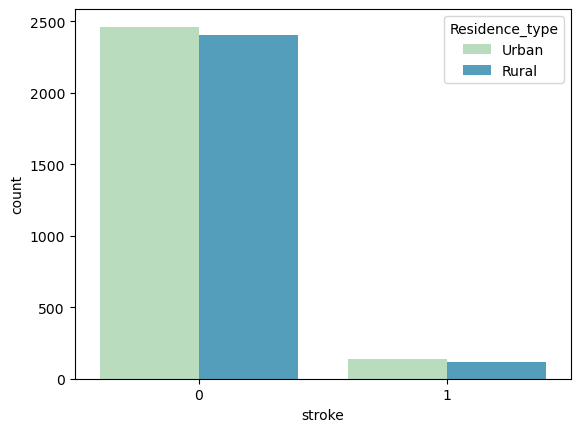

In [31]:
sns.countplot(x = 'stroke', hue = 'Residence_type', data = df, palette = 'GnBu')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

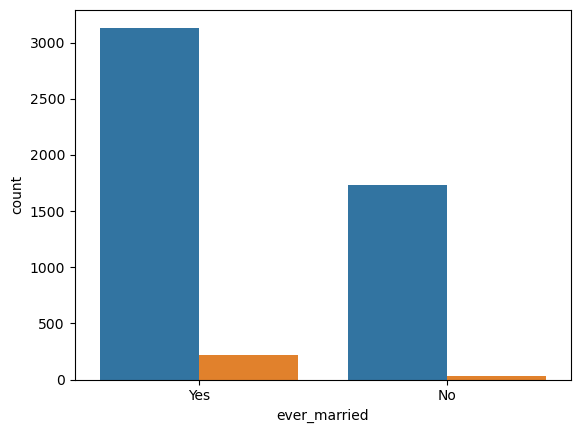

In [32]:
sns.countplot(x='ever_married', hue = 'stroke', data =df)
plt.title('Marital Status')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

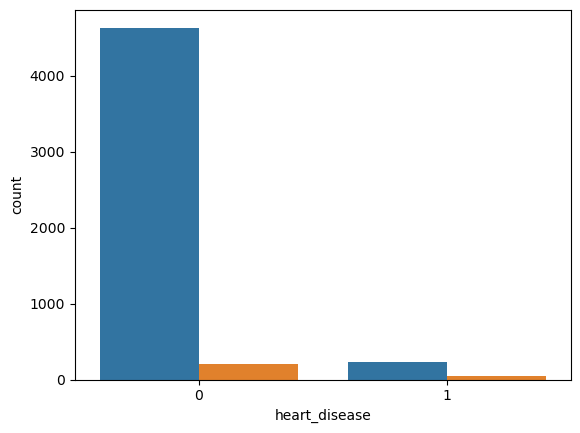

In [33]:
sns.countplot(x='heart_disease', hue = 'stroke', data =df)
plt.title('Marital Status')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

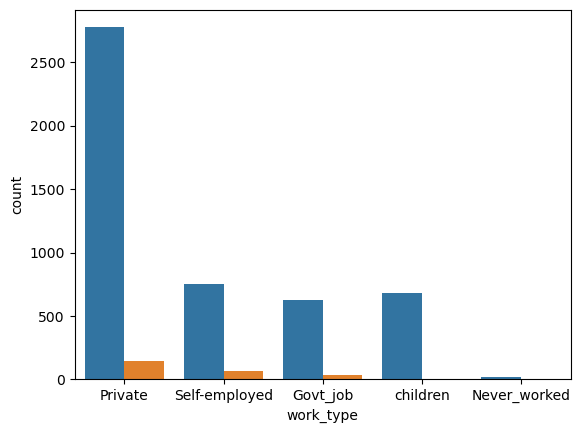

In [35]:
sns.countplot(x = 'work_type', hue = 'stroke', data =df)
plt.title('Occupation')
plt.show()

In [36]:
# Encoding on Catagorical veriable

In [41]:
residance = pd.get_dummies(df['Residence_type'], drop_first = True, dtype = 'int64')

In [42]:
residance

,Urban
0,1
1,0
2,0
3,1
4,0
...,...
5105,1
5106,1
5107,0
5108,0


In [43]:
df1 = pd.concat([df, residance], axis= 1)

In [44]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [45]:
df1.drop(['Residence_type'], axis =1, inplace = True)

In [46]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,0


In [51]:
sex = pd.get_dummies(df['gender'], drop_first = True, dtype = 'int64')

In [52]:
df2 = pd.concat([df1, sex], axis =1)

In [53]:
df2.drop(['gender'], axis =1, inplace = True)

In [54]:
df2.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Male,Other
0,9046,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,1,1,0
1,51676,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1,0,0,0
2,31112,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,0,0,0


In [56]:
merriade = pd.get_dummies(df['ever_married'], drop_first = True, dtype = 'int64')
df3 = pd.concat([df2, merriade], axis =1)
df3.drop(['ever_married'], axis =1, inplace = True)
df3.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Male,Other,Yes
0,9046,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,0,1
1,51676,61.0,0,0,Self-employed,202.21,NaN,never smoked,1,0,0,0,1
2,31112,80.0,0,1,Private,105.92,32.5,never smoked,1,0,1,0,1
3,60182,49.0,0,0,Private,171.23,34.4,smokes,1,1,0,0,1
4,1665,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,0,0,1


In [59]:
work = pd.get_dummies(df['work_type'], drop_first = True, dtype = 'int64')
df4 = pd.concat([df3, work], axis =1)
df4.drop(['work_type'], axis =1, inplace = True)
df4.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Urban,Male,Other,Yes,Never_worked,Private,Self-employed,children
0,9046,67.0,0,1,228.69,36.6,formerly smoked,1,1,1,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,never smoked,1,0,0,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,never smoked,1,0,1,0,1,0,1,0,0
3,60182,49.0,0,0,171.23,34.4,smokes,1,1,0,0,1,0,1,0,0
4,1665,79.0,1,0,174.12,24.0,never smoked,1,0,0,0,1,0,0,1,0


In [58]:
merriade = pd.get_dummies(df['ever_married'], drop_first = True, dtype = 'int64')
df3 = pd.concat([df2, merriade], axis =1)
df3.drop(['ever_married'], axis =1, inplace = True)
df3.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Male,Other,Yes
0,9046,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,0,1
1,51676,61.0,0,0,Self-employed,202.21,NaN,never smoked,1,0,0,0,1
2,31112,80.0,0,1,Private,105.92,32.5,never smoked,1,0,1,0,1
3,60182,49.0,0,0,Private,171.23,34.4,smokes,1,1,0,0,1
4,1665,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,0,0,1


In [60]:
smoking = pd.get_dummies(df['smoking_status'], drop_first = True, dtype = 'int64')
df5 = pd.concat([df4, merriade], axis =1)
df5.drop(['smoking_status'], axis =1, inplace = True)
df5.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban,Male,Other,Yes,Never_worked,Private,Self-employed,children,Yes
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,1,0,1,0,0,1
1,51676,61.0,0,0,202.21,NaN,1,0,0,0,1,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,1,0,1


In [61]:
df5.isna().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
Urban                  0
Male                   0
Other                  0
Yes                    0
Never_worked           0
Private                0
Self-employed          0
children               0
Yes                    0
dtype: int64

In [66]:
df5['bmi'].dropna(inplace = True)

In [67]:
df5.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban,Male,Other,Yes,Never_worked,Private,Self-employed,children,Yes
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,1,0,1,0,0,1
1,51676,61.0,0,0,202.21,NaN,1,0,0,0,1,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,1,0,1


In [68]:
df5.dropna(inplace =True)

In [69]:
df5.isna().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Urban                0
Male                 0
Other                0
Yes                  0
Never_worked         0
Private              0
Self-employed        0
children             0
Yes                  0
dtype: int64

In [70]:
X = df5.drop('stroke', axis =1)
y = df5['stroke']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state =3)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()

In [77]:
model.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.33      0.02      0.03        61

    accuracy                           0.96      1473
   macro avg       0.65      0.51      0.50      1473
weighted avg       0.93      0.96      0.94      1473



In [85]:
accuracy_score(y_test, y_pred)

0.957909029192125

In [88]:
print(confusion_matrix(y_test, y_pred))

[[1410    2]
 [  60    1]]


<Axes: >

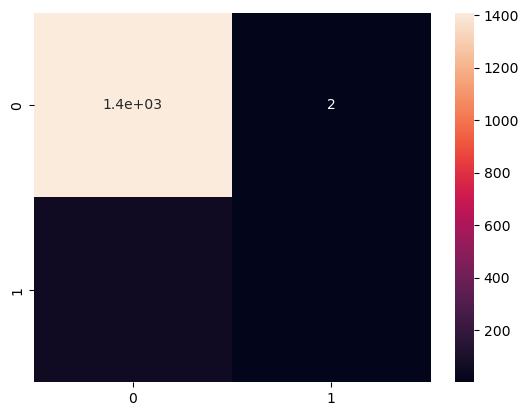

In [90]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)